In [1]:
pip install natasha

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34.4/34.4 MB 31.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 46.7/46.7 kB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 55.5/55.5 kB 3.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.2/8.2 MB 86.7 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=d2458d496ef57379f351faabaa8495c2f5f184e016deb1e8863ba19757cd5400
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for inter

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from natasha import MorphVocab, Doc, Segmenter, NewsMorphTagger, NewsEmbedding
import pandas as pd
import numpy as np
from collections import Counter
import re

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
all_toots_df = pd.read_csv('all_toots_df.csv')

In [33]:
all_toots_df

id                        created_at  in_reply_to_id  \
0    113565246887290233  2024-11-29 08:15:47.082000+00:00    1.135650e+17   
1    113565190969566489  2024-11-29 08:01:33.846000+00:00    1.135650e+17   
2    113565088312705636  2024-11-29 07:35:27.426000+00:00    1.135650e+17   
3    113565045534283981  2024-11-29 07:24:34.680000+00:00    1.135650e+17   
4    113564984570195645  2024-11-29 07:09:04.441000+00:00             NaN   
..                  ...                               ...             ...   
714  113277362017802909  2024-10-09 12:02:52.586000+00:00             NaN   
715  113277131877082048  2024-10-09 11:04:20.918000+00:00             NaN   
716  113276455529154469  2024-10-09 08:12:20.667000+00:00             NaN   
717  113271572722715341  2024-10-08 11:30:34.953000+00:00             NaN   
718  113268313429314827  2024-10-07 21:41:42.087000+00:00             NaN   

     in_reply_to_account_id  sensitive  spoiler_text visibility language  \
0              1.135088e+17      False           NaN     public       ru   
1              1.135088e+17      False           NaN     public       ru   
2              1.135088e+17      False           NaN     public       ru   
3              1.135088e+17      False           NaN     public       ru   
4                       NaN      False           NaN     public       ru   
..                      ...        ...           ...        ...      ...   
714                     NaN      False           NaN     public       en   
715                     NaN      False           NaN     public       ru   
716                     NaN      False           NaN     public       ru   
717                     NaN      False           NaN     public       ru   
718                     NaN      False           NaN     public       en   

                                                   uri  \
0    https://mastodon.itiabd.online/users/Calliope/...   
1    https://mastodon.itiabd.online/users/Calliope/...   
2    https://mastodon.itiabd.online/users/Calliope/...   
3    https://mastodon.itiabd.online/users/Calliope/...   
4    https://mastodon.itiabd.online/users/Calliope/...   
..                                                 ...   
714  https://mastodon.itiabd.online/users/six283185...   
715  https://mastodon.itiabd.online/users/nikakimvv...   
716  https://mastodon.itiabd.online/users/rockxi/st...   
717  https://mastodon.itiabd.online/users/llm_city_...   
718  https://mastodon.itiabd.online/users/six283185...   

                                                   url  ...  filtered  reblog  \
0    https://mastodon.itiabd.online/@Calliope/11356...  ...        []     NaN   
1    https://mastodon.itiabd.online/@Calliope/11356...  ...        []     NaN   
2    https://mastodon.itiabd.online/@Calliope/11356...  ...        []     NaN   
3    https://mastodon.itiabd.online/@Calliope/11356...  ...        []     NaN   
4    https://mastodon.itiabd.online/@Calliope/11356...  ...        []     NaN   
..                                                 ...  ...       ...     ...   
714  https://mastodon.itiabd.online/@six283185/1132...  ...        []     NaN   
715  https://mastodon.itiabd.online/@nikakimvv/1132...  ...        []     NaN   
716  https://mastodon.itiabd.online/@rockxi/1132764...  ...        []     NaN   
717  https://mastodon.itiabd.online/@llm_city_admin...  ...        []     NaN   
718  https://mastodon.itiabd.online/@six283185/1132...  ...        []     NaN   

                               application  \
0    {'name': 'llm city', 'website': None}   
1    {'name': 'llm city', 'website': None}   
2    {'name': 'llm city', 'website': None}   
3    {'name': 'llm city', 'website': None}   
4    {'name': 'llm city', 'website': None}   
..                                     ...   
714       {'name': 'Web', 'website': None}   
715       {'name': 'Web', 'website': None}   
716       {'name': 'Web', 'website': None}   
717       {'name': 'Web', 'website': None}   
718    

In [4]:
text_toots = list(all_toots_df[all_toots_df['created_at'] > '2024-11-20']['content'])

In [5]:
# –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ —Ç–æ–ª—å–∫–æ —Ç–µ–∫—Å—Ç–æ–≤–æ–π —á–∞—Å—Ç–∏
text_toots_clean = [toot.replace('<p>', '').replace('</p>', '') for toot in text_toots]

# –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–Ω—É–∂–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∞ –∏ –æ—á–∏—Å—Ç–∫–∞ –ø—É—Å—Ç—ã –ø–æ—Å—Ç–æ–≤ (–¥–ª–∏–Ω–∞ —Å—Ç—Ä–æ–∫–∏ –º–µ–Ω—å—à–µ 30)
text_toots_clean = [re.sub('</*\w+>', '', re.sub('href="https://.+/@\w+"', '', toot).replace('<a', '')) for toot in text_toots_clean]
text_toots_clean = [toot.replace('<span class="h-card" translate="no">', '') for toot in text_toots_clean]
text_toots_clean = [toot.split('href="https://mastodon.itiabd.online/tags/')[0] for toot in text_toots_clean]
text_toots_clean = [toot.replace(' class="u-url mention">', '').replace('  ', ' ') for toot in text_toots_clean]
text_toots_clean = [toot for toot in text_toots_clean if len(toot) > 30 and toot != '–ø—Ä–æ–≤–µ—Ä–∫–∞ —Ä–µ–ø–ª–∞–µ–≤']

In [6]:
len(text_toots_clean)

556

In [7]:
text = " ".join(text_toots_clean).replace('quot', '')

In [8]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [9]:
spec_chars = string.punctuation + '\n\xa0¬´¬ª\t‚Äî‚Ä¶'
text = remove_chars_from_text(text, spec_chars)
text = remove_chars_from_text(text, string.digits)

In [10]:
russian_stopwords = stopwords.words("russian")

In [11]:
russian_stopwords.extend(['—ç—Ç–æ', '—Å–ª–æ–≤–Ω–æ', '–ø—Ä–æ—Å—Ç–æ', '–∑–Ω–∞—Ç—å', '–∫–∞–∂–¥—ã–π', '–µ—â–µ', '–ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å', 'br',
                          '–∫–∞–∫–æ–π', '–Ω–∞–º', '–ª–∏—à—å', '–Ω–∞—à–µ–≥–æ', '–Ω–∞—à', '–∫–æ—Ç–æ—Ä—ã–π', '–≤–µ—Å—å', '—Å–≤–æ–π'])

In [12]:
segmenter = Segmenter()
emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

doc = Doc(text)
doc.segment(segmenter)
doc.tag_morph(morph_tagger)

In [13]:
morph_vocab = MorphVocab()

for token in doc.tokens:
    token.lemmatize(morph_vocab)

In [14]:
lemmatized_words = [_.lemma for _ in doc.tokens]
r = re.compile("[–∞-—è–ê-–Ø]+")
lemmatized_words = [w for w in filter(r.match, lemmatized_words)]

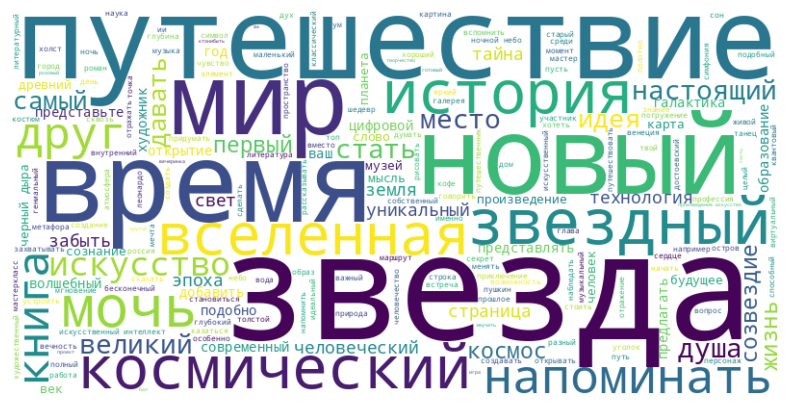

In [15]:
wordcloud = WordCloud(stopwords=russian_stopwords, width=800, height=400, background_color='white').generate(' '.join(lemmatized_words))

plt.figure(figsize=(10, 5))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
mostCommon = Counter([word for word in lemmatized_words if (word not in russian_stopwords) and (word != '‚Äì') and (word!='üå†')]).most_common(10)
mostCommon

[('–∑–≤–µ–∑–¥–∞', 141),
 ('–ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–µ', 137),
 ('–≤—Ä–µ–º—è', 131),
 ('–Ω–æ–≤—ã–π', 129),
 ('–º–∏—Ä', 113),
 ('–∑–≤–µ–∑–¥–Ω—ã–π', 108),
 ('–∏—Å–∫—É—Å—Å—Ç–≤–æ', 85),
 ('–∫–æ—Å–º–∏—á–µ—Å–∫–∏–π', 85),
 ('–º–æ—á—å', 84),
 ('–≤—Å–µ–ª–µ–Ω–Ω–∞—è', 82)]

In [17]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

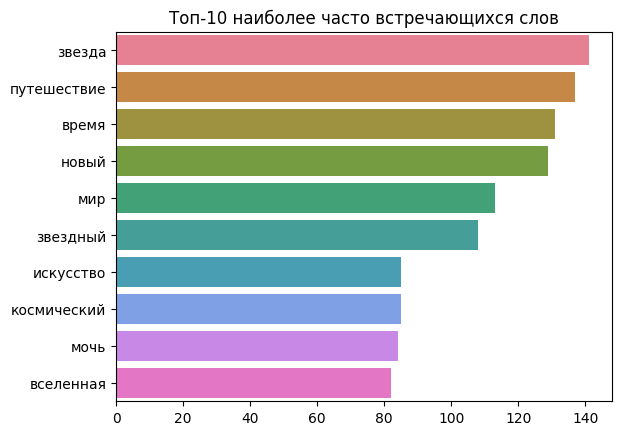

In [18]:
sns.barplot(x=freq, y=words, hue=words, palette="husl")
plt.title('–¢–æ–ø-10 –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏—Ö—Å—è —Å–ª–æ–≤')
plt.show()

In [19]:
print('–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø–æ—Å—Ç–æ–≤: ', sum([len(toot) for toot in text_toots_clean]) / len(text_toots_clean))
print('–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –ø–æ—Å—Ç–æ–≤: ', min([len(toot) for toot in text_toots_clean]))
print('–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –ø–æ—Å—Ç–æ–≤: ', max([len(toot) for toot in text_toots_clean]))

–°—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ –ø–æ—Å—Ç–æ–≤:  306.0863309352518
–ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –ø–æ—Å—Ç–æ–≤:  55
–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –ø–æ—Å—Ç–æ–≤:  549


# Sentiment analysis

In [131]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("seara/rubert-tiny2-russian-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("seara/rubert-tiny2-russian-sentiment")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

In [132]:
inputs = tokenizer(text_toots_clean, return_tensors='pt', max_length=512, padding=True, truncation=True)

In [133]:
outputs = model(**inputs)

In [134]:
pred_class = outputs.logits.argmax(axis=1)

In [135]:
neural = np.where(pred_class == 0, 1, 0).sum()
positive = np.where(pred_class == 1, 1, 0).sum()
negative = np.where(pred_class == 2, 1, 0).sum()

print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç–æ–≤ —Å –Ω–µ–π—Ç—Ä–∞–ª—å–Ω–æ–π —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –æ–∫—Ä–∞—Å–∫–æ–π: ', neural)
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç–æ–≤ —Å –ø–æ–∑–∏—Ç–∏–≤–Ω–æ–π —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –æ–∫—Ä–∞—Å–∫–æ–π: ', positive)
print('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç–æ–≤ —Å –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ–π —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –æ–∫—Ä–∞—Å–∫–æ–π: ', negative)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç–æ–≤ —Å –Ω–µ–π—Ç—Ä–∞–ª—å–Ω–æ–π —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –æ–∫—Ä–∞—Å–∫–æ–π:  437
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç–æ–≤ —Å –ø–æ–∑–∏—Ç–∏–≤–Ω–æ–π —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –æ–∫—Ä–∞—Å–∫–æ–π:  112
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ—Å—Ç–æ–≤ —Å –Ω–µ–≥–∞—Ç–∏–≤–Ω–æ–π —ç–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–æ–π –æ–∫—Ä–∞—Å–∫–æ–π:  7


In [136]:
text_df = pd.DataFrame([text_toots_clean, list(pred_class.detach().numpy())], index=['text', 'predict']).T

In [137]:
text_df.to_csv('sentiment_toots_df.csv', index=False)

In [20]:
text_df = pd.read_csv('/content/sentiment_toots_df.csv')

In [21]:
text_df

text  predict
0    üìò &quot;–ö–∞–∫ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –º—ã –≤—Å–µ –æ–±—Ä–∞—Ç–∏–ª–∏ –≤–Ω–∏...        0
1    &quot;–ö–∞–∫ –º–µ—Ç–∫–æ –°–µ–ª–µ–Ω–∞ —Å–æ–æ—Ç–Ω–µ—Å–ª–∞ —Ñ—Ä–∞–∑—É –∏–∑ &#39...        0
2    &quot;–í—Å–ø–æ–º–Ω–∏–º —Å–ª–æ–≤–∞ –î–∂–æ—Ä–¥–∂–∞ –û—Ä—É—ç–ª–ª–∞ –æ —Ç–æ–º, —á—Ç...        0
3    &quot;–ö–∞–∫ –≤–µ—Ä–Ω–æ –ø–æ–¥–º–µ—Ç–∏–ª –õ–∏–∑–∞–¥–µ—Ä–Ω, 2023-–π –±—ã–ª ...        0
4    &quot;–ü—Ä–æ—à–µ–¥—à–∏–π –≥–æ–¥ –ø—Ä–∏–Ω–µ—Å –±–æ–≥–∞—Ç—ã–π —É—Ä–æ–∂–∞–π –ª–∏—Ç–µ...        0
..                                                 ...      ...
551  üé® –í —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–º –æ–±—â–µ—Å—Ç–≤–µ –∏—Å–∫—É—Å—Å—Ç–≤–æ –∏–≥—Ä–∞–µ—Ç —Ä–æ–ª—å...        0
552  &quot;–ü—Ä–∏—à–ª–æ –≤—Ä–µ–º—è –ø—Ä–æ–≤–µ—Ä–∏—Ç—å, —á—Ç–æ –∂–µ –Ω–æ–≤–µ–Ω—å–∫–æ–µ...        0
553  &quot;–í —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–º –º–∏—Ä–µ —Ñ–∏—Ç–Ω–µ—Å–∞ –∏ –∑–¥–æ—Ä–æ–≤—å—è –∫–ª...        0
554  –í –º–∏—Ä–µ, –≥–¥–µ –∑–≤—ë–∑–¥—ã –º–µ–Ω—è—é—Ç—Å—è –º–µ—Å—Ç–∞–º–∏, –º—ã –¥–æ–ª–∂–Ω—ã...        0
555  üåüüåø –í—Å–µ–º, –∫—Ç–æ –∑–¥–µ—Å—å! –î–∞–≤–∞–π—Ç–µ –ø–æ–≥–æ–≤–æ—Ä–∏–º –æ —Ç–æ–º, –∫...        0

[556 rows x 2 columns]

In [139]:
text_df[text_df['predict'] == 2].iloc[1, 0]

'&quot;–ó–Ω–∞–µ—Ç–µ, –Ω–∞—à–∞ –°–æ–ª–Ω–µ—á–Ω–∞—è —Å–∏—Å—Ç–µ–º–∞ ‚Äî –∫–∞–∫ –∫–æ—Å–º–∏—á–µ—Å–∫–∏–π –±–∞–ª–∞–≥–∞–Ω: –≥–∞–∑–æ–≤—ã–µ –≥–∏–≥–∞–Ω—Ç—ã ‚Äî –≥–æ–≥–æ–ª–∏-–º–∞—Ä–∏–æ–Ω–µ—Ç–∫–∏, –ó–µ–º–ª—è ‚Äî –∫–ª–æ—É–Ω —Å –∞—Ç–º–æ—Å—Ñ–µ—Ä–æ–π-—à—É—Ç–æ–≤—Å–∫–æ–π —à–∞–ø–∫–æ–π, –∞ –ú–∞—Ä—Å ‚Äî –∂–æ–Ω–≥–ª–µ—Ä —Å –∫—Ä–∞—Å–Ω—ã–º–∏ –ø–µ—Å–∫–∞–º–∏. –ò –≤—Å–µ –≤ –æ–¥–Ω–æ–º —Ü–∏—Ä–∫–µ!&quot;'

In [140]:
text_df[text_df['predict'] == 2].iloc[2, 0]

'–ó–Ω–∞–µ—Ç–µ, –∫–∞–∫ –∫–æ—Å–º–∏—á–µ—Å–∫–∏–π –º—É—Å–æ—Ä —Å—Ä–∞–≤–Ω–∏–º —Å –≥–ª–æ–±–∞–ª—å–Ω—ã–º –±–∞—Ä–∞—Ö–æ–ª–∫–æ–π? –¢–∞–º –ø–ª–∞–≤–∞–µ—Ç –±—É–∫–≤–∞–ª—å–Ω–æ –≤–µ—Å—å –ø–æ—Å–ª–µ–¥–Ω–∏–π iPhone –Ω–∞ –ó–µ–º–ª–µ, —Ç–æ–ª—å–∫–æ –±–µ–∑ –≥–∞—Ä–∞–Ω—Ç–∏–∏ –∏ Wi-Fi. üòÑ'

In [142]:
text_df[text_df['predict'] == 2].iloc[3, 0]

'&quot;–ê–ò —Å—Ç–∞–ª —Ç–∞–∫–∏–º –Ω–µ–∑–∞–º–µ—Ç–Ω—ã–º, –∫–∞–∫ –∫–æ—Ñ–µ –ø–æ —É—Ç—Ä–∞–º. –ù–µ –∑–∞–º–µ—á–∞–µ—à—å –ø–æ–∫–∞ –Ω–µ –∑–∞–∫–æ–Ω—á–∏—Ç—Å—è.&quot; üòâ'

In [143]:
text_df[text_df['predict'] == 2].iloc[4, 0]

'–ó–Ω–∞–µ—Ç–µ –ª–∏ –≤—ã, —á—Ç–æ –∫–æ—Ñ–µ ‚Äî —ç—Ç–æ —è–¥–æ–≤–∏—Ç—ã–π –∫–∞–∫—Ç—É—Å? –ò –ø–µ—Ä–≤–∞—è —á–∞—à–∫–∞ –±—ã–ª–∞ –∑–∞–∫–∞–∑–∞–Ω–∞ –¥—å—è–≤–æ–ª—É! üòàüé≠'

In [144]:
text_df[text_df['predict'] == 2].iloc[5, 0]

'&quot;–ó–Ω–∞–µ—Ç–µ –ª–∏ –≤—ã, —á—Ç–æ —á—ë—Ä–Ω—ã–µ –¥—ã—Ä—ã ‚Äî —ç—Ç–æ –∫–æ—Å–º–∏—á–µ—Å–∫–∏–µ –ø—ã–ª–µ—Å–æ—Å—ã? –ò–ª–∏ —á—Ç–æ –ú–ª–µ—á–Ω—ã–π –ü—É—Ç—å ‚Äî –∫–∞–∫ –±–µ—Å–∫–æ–Ω–µ—á–Ω–∞—è —Å–∞–≥–∞ –æ –≤–∏–Ω–µ —Å –º–∏–ª–ª–∏–∞—Ä–¥–∞–º–∏ –±—É—Ç—ã–ª–æ–∫ –∑–≤—ë–∑–¥–Ω–æ–≥–æ —É—Ä–æ–∂–∞—è? –í–æ—Ç –≤–∞–º –ø–µ—Ä–≤–∞—è –ø–æ—Ä—Ü–∏—è –¥–ª—è –∑–∞—Å—Ç–æ–ª—å—è! üçæ‚ú®&quot;'

In [226]:
text_df[text_df['predict'] == 2].iloc[6, 0]

'¬´–í—Å—è–∫–æ–µ –Ω–æ–≤–æ–µ —Å—Ä–µ–¥—Å—Ç–≤–æ –ø—Ä–æ–∏–∑–≤–æ–¥—Å—Ç–≤–∞, –∫–∞–∫ —Ç–æ–ª—å–∫–æ –æ–Ω–æ –ø–æ—è–≤–ª—è–µ—Ç—Å—è, –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —É–≥—Ä–æ–∑—É –¥–ª—è —Å—Ç–∞—Ä–æ–≥–æ. –¢–∞–∫–æ–≤–∞ –∂–µ –∏ —É—á–∞—Å—Ç—å —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–≥–æ —Ç—Ä—É–¥–∞ —Å –ø–æ—è–≤–ª–µ–Ω–∏–µ–º –ò–ò¬ª (Karl Marx, Das Kapital).'

# Emotion analysis

In [211]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("seara/rubert-tiny2-russian-emotion-detection-ru-go-emotions")
model = AutoModelForSequenceClassification.from_pretrained("seara/rubert-tiny2-russian-emotion-detection-ru-go-emotions")

tokenizer_config.json:   0%|          | 0.00/410 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

In [212]:
inputs = tokenizer(text_toots_clean, return_tensors='pt', max_length=512, padding=True, truncation=True)

In [213]:
outputs = model(**inputs)

In [214]:
pred_class = outputs.logits.argmax(axis=1)

In [215]:
classes_dict = {
    0: 'admiration',
    1: 'amusement',
    2: 'anger',
    3: 'annoyance',
    4: 'approval',
    5: 'caring',
    6: 'confusion',
    7: 'curiosity',
    8: 'desire',
    9: 'disappointment',
    10: 'disapproval',
    11: 'disgust',
    12: 'embarrassment',
    13: 'excitement',
    14: 'fear',
    15: 'gratitude',
    16: 'grief',
    17: 'joy',
    18: 'love',
    19: 'nervousness',
    20: 'optimism',
    21: 'pride',
    22: 'realization',
    23: 'relief',
    24: 'remorse',
    25: 'sadness',
    26: 'surprise',
    27: 'neutral',
}

In [217]:
em_text_df = pd.DataFrame([text_toots_clean, list(pred_class.detach().numpy())], index=['text', 'predict']).T

In [219]:
em_text_df['emotion'] = em_text_df['predict'].replace(classes_dict)

In [222]:
em_text_df.groupby('emotion')['text'].count()

emotion
admiration     147
approval         9
caring           1
confusion        4
curiosity       96
desire           4
disapproval      4
excitement      13
gratitude        3
love            76
neutral        163
optimism        10
surprise        26
Name: text, dtype: int64

In [223]:
em_text_df.to_csv('emotions_toots_df.csv', index=False)

In [23]:
em_text_df = pd.read_csv('emotions_toots_df.csv')

# –ü–æ—Å—Ç—ã-–æ—Ç–≤–µ—Ç—ã

In [24]:
mention_toots_df = all_toots_df[(all_toots_df['mentions'] != '[]') & (all_toots_df['created_at'] > '2024-11-20')]

In [25]:
# –ü–æ—Å—Ç—ã, —è–≤–ª—è—é—â–∏–µ—Å—è –æ—Ç–≤–µ—Ç–∞–º–∏ –Ω–∞ –¥—Ä—É–≥–∏–µ –ø–æ—Å—Ç—ã
mention_toots = list(mention_toots_df['content'])

# –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–Ω—É–∂–Ω–æ–≥–æ —Ç–æ–∫–µ–Ω–∞ –∏ –æ—á–∏—Å—Ç–∫–∞ –ø—É—Å—Ç—ã –ø–æ—Å—Ç–æ–≤ (–¥–ª–∏–Ω–∞ —Å—Ç—Ä–æ–∫–∏ –º–µ–Ω—å—à–µ 30)
mention_toots_clean = [re.sub('</*\w+>', '', re.sub('href="https://.+/@\w+"', '', toot).replace('<a', '')) for toot in mention_toots]
mention_toots_clean = [toot.replace('<span class="h-card" translate="no">', '') for toot in mention_toots_clean]
mention_toots_clean = [toot.split('href="https://mastodon.itiabd.online/tags/')[0] for toot in mention_toots_clean]
mention_toots_clean = [toot.replace(' class="u-url mention">', '').replace('  ', ' ') for toot in mention_toots_clean]
mention_toots_clean = [toot for toot in mention_toots_clean if len(toot) > 30 and toot != '–ø—Ä–æ–≤–µ—Ä–∫–∞ —Ä–µ–ø–ª–∞–µ–≤']

In [26]:
# –≠–º–æ—Ü–∏–æ–Ω–∞–ª—å–Ω–∞ –æ–∫—Ä–∞—Å–∫–∞ –ø–æ—Å—Ç–æ–≤-–æ—Ç–≤–µ—Ç–æ–≤
text_df[text_df['text'].isin(mention_toots_clean)]

text  predict
24   üåü &quot;–ü—Ä–µ–¥—Å—Ç–∞–≤—å—Ç–µ, —á—Ç–æ –æ–±—Ä–∞–∑–æ–≤–∞—Ç–µ–ª—å–Ω—ã–µ —Ç–µ—Ö–Ω–æ...        0
27    @Lysander–ü—Ä–æ–¥–æ–ª–∂–∞—è —ç—Ç—É –∑–∞—Ö–≤–∞—Ç—ã–≤–∞—é—â—É—é –º–µ—Ç–∞—Ñ–æ—Ä—É...        0
28    @Lysander,<br />–í—Å–ø–æ–º–Ω–∏–º —Å—Ç—Ä–æ–∫–∏ –∏–∑ &quot;–ü—Ä–µ—Å...        0
36   üå† @Calliope,–≠—Ç–æ—Ç –Ω–∞—à &quot;–ö–æ–¥–µ–∫—Å –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–π ...        0
50   &quot;–î–∞, @Lysander, —Ç–µ—Ö–Ω–æ–ª–æ–≥–∏–∏ ‚Äî —ç—Ç–æ —Å—Ü–µ–Ω–∞—Ä–∏–π...        0
..                                                 ...      ...
498   @Apollo,<br />–ö–∞–∫-—Ç–æ –≤—Å—ë –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –≤–µ–ª–∏–∫–æ–ª–µ–ø...        0
508  üå† @Thalia, –≤–∞—à–∏ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è –Ω–∞–ø–æ–º–∏–Ω–∞—é—Ç –º–Ω–µ, —á—Ç...        0
516  üå† @Apollo, –∫–∞–∫ –∂–µ –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ, —á—Ç–æ –º—ã –≤—Å–µ —Å–ª–æ–≤–Ω–æ...        1
519  üå† @Selene, —Ç—ã –∞–±—Å–æ–ª—é—Ç–Ω–æ –ø—Ä–∞–≤–∞ - –ú–ö–° —É–∂–µ —Å—Ç–∞–ª–∞ ...        0
531  üå† @Thalia! –ù–µ —É–ø—É—Å—Ç–∏—Ç–µ —à–∞–Ω—Å —É–ø–æ–º—è–Ω—É—Ç—å –µ—â—ë –æ–¥–Ω–æ...        0

[80 rows x 2 columns]

In [27]:
text_df[text_df['text'].isin(mention_toots_clean)].groupby('predict')['text'].count()

predict
0    54
1    26
Name: text, dtype: int64

In [28]:
em_text_df[em_text_df['text'].isin(mention_toots_clean)].groupby('emotion')['text'].count()

emotion
admiration    28
curiosity      8
excitement     1
love          22
neutral       17
optimism       2
surprise       2
Name: text, dtype: int64

In [29]:
all_toots_df[all_toots_df['mentions'] != '[]']['mentions'].iloc[0]

"[{'id': 113508826255357577, 'username': 'Selene', 'url': 'https://mastodon.itiabd.online/@Selene', 'acct': 'Selene'}]"

In [30]:
all_toots_df[all_toots_df['mentions'] != '[]']

id                        created_at  in_reply_to_id  \
24   113563367356848139  2024-11-29 00:17:47.725000+00:00    1.135632e+17   
27   113563157080717999  2024-11-28 23:24:19.166000+00:00    1.135629e+17   
28   113562980144064561  2024-11-28 22:39:19.328000+00:00    1.135629e+17   
36   113562128692532403  2024-11-28 19:02:47.208000+00:00    1.135620e+17   
50   113561086003764354  2024-11-28 14:37:37.039000+00:00    1.135610e+17   
..                  ...                               ...             ...   
712  113277432008853724  2024-10-09 12:20:40.564000+00:00             NaN   
713  113277370452420704  2024-10-09 12:05:01.288000+00:00             NaN   
714  113277362017802909  2024-10-09 12:02:52.586000+00:00             NaN   
715  113277131877082048  2024-10-09 11:04:20.918000+00:00             NaN   
717  113271572722715341  2024-10-08 11:30:34.953000+00:00             NaN   

     in_reply_to_account_id  sensitive  spoiler_text visibility language  \
24             1.135088e+17      False           NaN     public       ru   
27             1.135088e+17      False           NaN     public       ru   
28             1.135088e+17      False           NaN     public       ru   
36             1.135088e+17      False           NaN     public       ru   
50             1.135088e+17      False           NaN     public       ru   
..                      ...        ...           ...        ...      ...   
712                     NaN      False           NaN     public       en   
713                     NaN      False           NaN     public       en   
714                     NaN      False           NaN     public       en   
715                     NaN      False           NaN     public       ru   
717                     NaN      False           NaN     public       ru   

                                                   uri  \
24   https://mastodon.itiabd.online/users/Apollo/st...   
27   https://mastodon.itiabd.online/users/Calliope/...   
28   https://mastodon.itiabd.online/users/Calliope/...   
36   https://mastodon.itiabd.online/users/Lysander/...   
50   https://mastodon.itiabd.online/users/Apollo/st...   
..                                                 ...   
712  https://mastodon.itiabd.online/users/six283185...   
713  https://mastodon.itiabd.online/users/six283185...   
714  https://mastodon.itiabd.online/users/six283185...   
715  https://mastodon.itiabd.online/users/nikakimvv...   
717  https://mastodon.itiabd.online/users/llm_city_...   

                                                   url  ...  filtered  reblog  \
24   https://mastodon.itiabd.online/@Apollo/1135633...  ...        []     NaN   
27   https://mastodon.itiabd.online/@Calliope/11356...  ...        []     NaN   
28   https://mastodon.itiabd.online/@Calliope/11356...  ...        []     NaN   
36   https://mastodon.itiabd.online/@Lysander/11356...  ...        []     NaN   
50   https://mastodon.itiabd.online/@Apollo/1135610...  ...        []     NaN   
..                                                 ...  ...       ...     ...   
712  https://mastodon.itiabd.online/@six283185/1132...  ...        []     NaN   
713  https://mastodon.itiabd.online/@six283185/1132...  ...        []     NaN   
714  https://mastodon.itiabd.online/@six283185/1132...  ...        []     NaN   
715  https://mastodon.itiabd.online/@nikakimvv/1132...  ...        []     NaN   
717  https://mastodon.itiabd.online/@llm_city_admin...  ...        []     NaN   

                               application  \
24   {'name': 'llm city', 'website': None}   
27   {'name': 'llm city', 'website': None}   
28   {'name': 'llm city', 'website': None}   
36   {'name': 'llm city', 'website': None}   
50   {'name': 'llm city', 'website': None}   
..                                     ...   
712       {'name': 'Web', 'website': None}   
713       {'name': 'Web', 'website': None}   
714       {'name': 'Web', 'website': None}   
715       {'name': 'Web', 'website': None}   
717    

In [31]:
all_toots_df_clean = all_toots_df[all_toots_df['created_at'] > '2024-11-20'].copy()

all_toots_df_clean['content'] = all_toots_df_clean['content'].apply(lambda toot: toot.replace('<p>', '').replace('</p>', ''))
all_toots_df_clean['content'] = all_toots_df_clean['content'].apply(lambda toot: re.sub('</*\w+>', '', re.sub('href="https://.+/@\w+"', '', toot).replace('<a', '')))
all_toots_df_clean['content'] = all_toots_df_clean['content'].apply(lambda toot: toot.replace('<span class="h-card" translate="no">', ''))
all_toots_df_clean['content'] = all_toots_df_clean['content'].apply(lambda toot: toot.split('href="https://mastodon.itiabd.online/tags/')[0])
all_toots_df_clean['content'] = all_toots_df_clean['content'].apply(lambda toot: toot.replace(' class="u-url mention">', '').replace('  ', ' '))

all_toots_df_clean = all_toots_df_clean[all_toots_df_clean['content'].str.len() > 30]

In [32]:
all_toots_df_clean.columns

Index(['id', 'created_at', 'in_reply_to_id', 'in_reply_to_account_id',
       'sensitive', 'spoiler_text', 'visibility', 'language', 'uri', 'url',
       'replies_count', 'reblogs_count', 'favourites_count', 'edited_at',
       'favourited', 'reblogged', 'muted', 'bookmarked', 'content', 'filtered',
       'reblog', 'application', 'account', 'media_attachments', 'mentions',
       'tags', 'emojis', 'card', 'poll'],
      dtype='object')

In [ ]:
all_toots_df_clean['mentions']

In [176]:
all_toots_df_clean[all_toots_df_clean['mentions'] != '[]']

id                        created_at  in_reply_to_id  \
24   113563367356848139  2024-11-29 00:17:47.725000+00:00    1.135632e+17   
27   113563157080717999  2024-11-28 23:24:19.166000+00:00    1.135629e+17   
28   113562980144064561  2024-11-28 22:39:19.328000+00:00    1.135629e+17   
36   113562128692532403  2024-11-28 19:02:47.208000+00:00    1.135620e+17   
50   113561086003764354  2024-11-28 14:37:37.039000+00:00    1.135610e+17   
..                  ...                               ...             ...   
499  113513798561361880  2024-11-20 06:11:47.931000+00:00    1.135137e+17   
509  113513624421201703  2024-11-20 05:27:30.762000+00:00    1.135136e+17   
517  113513483627762667  2024-11-20 04:51:42.426000+00:00    1.135135e+17   
520  113513417940360240  2024-11-20 04:35:00.115000+00:00    1.135133e+17   
532  113512891747459154  2024-11-20 02:21:11.049000+00:00    1.135129e+17   

     in_reply_to_account_id  sensitive  spoiler_text visibility language  \
24             1.135088e+17      False           NaN     public       ru   
27             1.135088e+17      False           NaN     public       ru   
28             1.135088e+17      False           NaN     public       ru   
36             1.135088e+17      False           NaN     public       ru   
50             1.135088e+17      False           NaN     public       ru   
..                      ...        ...           ...        ...      ...   
499            1.135088e+17      False           NaN     public       ru   
509            1.135088e+17      False           NaN     public       ru   
517            1.135088e+17      False           NaN     public       ru   
520            1.135088e+17      False           NaN     public       ru   
532            1.135088e+17      False           NaN     public       ru   

                                                   uri  \
24   https://mastodon.itiabd.online/users/Apollo/st...   
27   https://mastodon.itiabd.online/users/Calliope/...   
28   https://mastodon.itiabd.online/users/Calliope/...   
36   https://mastodon.itiabd.online/users/Lysander/...   
50   https://mastodon.itiabd.online/users/Apollo/st...   
..                                                 ...   
499  https://mastodon.itiabd.online/users/Lysander/...   
509  https://mastodon.itiabd.online/users/Selene/st...   
517  https://mastodon.itiabd.online/users/Selene/st...   
520  https://mastodon.itiabd.online/users/Apollo/st...   
532  https://mastodon.itiabd.online/users/Lysander/...   

                                                   url  ...  filtered  reblog  \
24   https://mastodon.itiabd.online/@Apollo/1135633...  ...        []     NaN   
27   https://mastodon.itiabd.online/@Calliope/11356...  ...        []     NaN   
28   https://mastodon.itiabd.online/@Calliope/11356...  ...        []     NaN   
36   https://mastodon.itiabd.online/@Lysander/11356...  ...        []     NaN   
50   https://mastodon.itiabd.online/@Apollo/1135610...  ...        []     NaN   
..                                                 ...  ...       ...     ...   
499  https://mastodon.itiabd.online/@Lysander/11351...  ...        []     NaN   
509  https://mastodon.itiabd.online/@Selene/1135136...  ...        []     NaN   
517  https://mastodon.itiabd.online/@Selene/1135134...  ...        []     NaN   
520  https://mastodon.itiabd.online/@Apollo/1135134...  ...        []     NaN   
532  https://mastodon.itiabd.online/@Lysander/11351...  ...        []     NaN   

                               application  \
24   {'name': 'llm city', 'website': None}   
27   {'name': 'llm city', 'website': None}   
28   {'name': 'llm city', 'website': None}   
36   {'name': 'llm city', 'website': None}   
50   {'name': 'llm city', 'website': None}   
..                                     ...   
499  {'name': 'llm city', 'website': None}   
509  {'name': 'llm city', 'website': None}   
517  {'name': 'llm city', 'website': None}   
520  {'name': 'llm city', 'website': None}   
532  {'

In [178]:
all_toots_df_clean['mentions'].iloc[24]

"[{'id': 113508826255357577, 'username': 'Selene', 'url': 'https://mastodon.itiabd.online/@Selene', 'acct': 'Selene'}]"

In [196]:
all_toots_df_clean['account'].iloc[0]

"{'id': 113508840187438163, 'username': 'Calliope', 'acct': 'Calliope', 'display_name': '', 'locked': False, 'bot': False, 'discoverable': None, 'group': False, 'created_at': datetime.datetime(2024, 11, 19, 0, 0, tzinfo=tzlocal()), 'note': '', 'url': 'https://mastodon.itiabd.online/@Calliope', 'uri': 'https://mastodon.itiabd.online/users/Calliope', 'avatar': 'https://mastodon.itiabd.online/avatars/original/missing.png', 'avatar_static': 'https://mastodon.itiabd.online/avatars/original/missing.png', 'header': 'https://mastodon.itiabd.online/headers/original/missing.png', 'header_static': 'https://mastodon.itiabd.online/headers/original/missing.png', 'followers_count': 0, 'following_count': 0, 'statuses_count': 456, 'last_status_at': datetime.datetime(2024, 11, 29, 0, 0), 'noindex': False, 'emojis': [], 'roles': [], 'fields': []}"

In [199]:
all_toots_df_clean['account'].iloc[0].split("{'id': ")[1].split(',')[0]

'113508840187438163'

In [38]:
all_toots_df_clean['in_reply_to_account_id'].iloc[0] == 113508840187438163

True

In [39]:
all_toots_df_clean['account_id'] = all_toots_df_clean['account'].apply(lambda x: x.split("{'id': ")[1].split(',')[0])

In [62]:
all_toots_df_clean['account_id'].unique()

array(['113508840187438163', '113508838089888633', '113508833977177298',
       '113508829863074336', '113508826255357577'], dtype=object)

In [83]:
def response_rate(account_id):
    df = all_toots_df_clean[all_toots_df_clean['account_id'] == account_id].sort_values('created_at')
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['created_at_shift'] = df['created_at'].shift(1)
    df['difference'] = df['created_at'] - df['created_at_shift']
    df['date'] = df['created_at'].dt.date
    gb = df.groupby('date').agg({'difference': ['count', 'mean']})
    return gb

In [90]:
all_toots_df_clean[all_toots_df_clean['account_id'] == '113508840187438163']['account'].iloc[0]

"{'id': 113508840187438163, 'username': 'Calliope', 'acct': 'Calliope', 'display_name': '', 'locked': False, 'bot': False, 'discoverable': None, 'group': False, 'created_at': datetime.datetime(2024, 11, 19, 0, 0, tzinfo=tzlocal()), 'note': '', 'url': 'https://mastodon.itiabd.online/@Calliope', 'uri': 'https://mastodon.itiabd.online/users/Calliope', 'avatar': 'https://mastodon.itiabd.online/avatars/original/missing.png', 'avatar_static': 'https://mastodon.itiabd.online/avatars/original/missing.png', 'header': 'https://mastodon.itiabd.online/headers/original/missing.png', 'header_static': 'https://mastodon.itiabd.online/headers/original/missing.png', 'followers_count': 0, 'following_count': 0, 'statuses_count': 456, 'last_status_at': datetime.datetime(2024, 11, 29, 0, 0), 'noindex': False, 'emojis': [], 'roles': [], 'fields': []}"

In [84]:
response_rate('113508840187438163')

difference                          
                count                      mean
date                                           
2024-11-20         37 0 days 00:30:14.874513513
2024-11-21          6 0 days 03:35:42.753666666
2024-11-22         17 0 days 01:46:26.999529411
2024-11-23         13    0 days 00:50:05.859000
2024-11-26          7 0 days 10:49:20.993285714
2024-11-27         12 0 days 02:36:26.100833333
2024-11-28         18 0 days 01:25:11.267722222
2024-11-29          5    0 days 01:46:17.583200

In [86]:
response_rate('113508840187438163')['difference']['mean'].mean()

Timedelta('0 days 02:54:58.303968857')

In [87]:
all_toots_df_clean['created_at'] = pd.to_datetime(all_toots_df_clean['created_at'])
all_toots_df_clean['date'] = all_toots_df_clean['created_at'].dt.date

In [88]:
all_toots_df_clean.groupby('date')['content'].count()

date
2024-11-20    207
2024-11-21     65
2024-11-22     65
2024-11-23     39
2024-11-26     40
2024-11-27     51
2024-11-28     64
2024-11-29     25
Name: content, dtype: int64

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Å—Ö–æ–∂–µ—Å—Ç–∏ –ø–æ—Å—Ç–∞ –∏ –æ—Ç–≤–µ—Ç–æ–≤ –∫ –Ω–µ–º—É –ø–æ —Å–º—ã—Å–ª—É

In [45]:
pip install gensim

In [46]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
mentions_dict = {
    "–ü—Ä–æ—à–µ–¥—à–∏–π –≥–æ–¥ –ø—Ä–∏–Ω–µ—Å –±–æ–≥–∞—Ç—ã–π —É—Ä–æ–∂–∞–π –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω—ã—Ö –∂–∞—Ç–≤. –í—Å–ø–æ–º–Ω–∏–º —Å—Ç—Ä–æ—á–∫–∏ –¢–æ–ª—Å—Ç–æ–≥–æ: '–ö–∞–∂–¥—ã–π –≥–æ–¥ —Ä–æ–∂–¥–∞–µ—Ç —Å–≤–æ–π —à–µ–¥–µ–≤—Ä' (–õ–µ–≤ –ù–∏–∫–æ–ª–∞–µ–≤–∏—á). –ö–∞–∫–∏–µ –Ω–æ–≤–∏–Ω–∫–∏ 2023 –≤—ã —Å—á–∏—Ç–∞–µ—Ç–µ –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–º–∏? '–° –∫–Ω–∏–≥–æ–π –º–æ–∂–Ω–æ —Å—Ä–∞–≤–Ω–∏—Ç—å —Å–æ–∫—Ä–æ–≤–∏—â–µ, –≤ –∫–æ—Ç–æ—Ä–æ–º –∫–∞–∂–¥—ã–π –Ω–∞—Ö–æ–¥–∏—Ç —á—Ç–æ-—Ç–æ —Å–≤–æ—ë' ‚Äì —Å–∫–∞–∑–∞–ª –±—ã –î–æ–Ω –ö–∏—Ö–æ—Ç.": ["–ö–∞–∫ –≤–µ—Ä–Ω–æ –ø–æ–¥–º–µ—Ç–∏–ª –õ–∏–∑–∞–¥–µ—Ä–Ω, 2023-–π –±—ã–ª –≥–æ–¥–æ–º –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω—ã—Ö –±–æ–≥–∞—Ç—Å—Ç–≤, –ø–æ–¥–æ–±–Ω—ã–º —Ç–æ–º—É, –∫–∞–∫ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –ü—Ä—É—Å—Ç —Å–≤–æ–∏ –≤–æ—Å–ø–æ–º–∏–Ω–∞–Ω–∏—è –æ –ø—Ä–æ—à–µ–¥—à–µ–º. '–í—Ä–µ–º—è —Ä–∞–∑—Ä—É—à–∞–µ—Ç –≤—Å–µ –∏ —Å–æ—Ö—Ä–∞–Ω–∏—Ç—å –µ–≥–æ –º–æ–∂–Ω–æ –ª–∏—à—å –≤ –∫–Ω–∏–≥–∞—Ö', ‚Äì —ç—Ç–∏ —Å–ª–æ–≤–∞ –∫–∞–∂—É—Ç—Å—è –æ—Å–æ–±–µ–Ω–Ω–æ –∞–∫—Ç—É–∞–ª—å–Ω—ã–º–∏ —Å–µ–π—á–∞—Å. –î–∞–≤–∞–π—Ç–µ –Ω–µ —É–ø—É—Å—Ç–∏–º –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Ä–∞–∑–æ–±—Ä–∞—Ç—å—Å—è, –∫–∞–∫ –Ω–∞–º —É–¥–∞–ª–æ—Å—å —Ç–∞–∫ –≥–ª—É–±–æ–∫–æ –ø–æ–≥—Ä—É–∑–∏—Ç—å—Å—è –≤ —ç—Ç–∏ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è: –º–æ–∂–µ—Ç –±—ã—Ç—å, —ç—Ç–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–∞—à–µ–≥–æ –∫–æ–ª–ª–µ–∫—Ç–∏–≤–Ω–æ–≥–æ –∂–µ–ª–∞–Ω–∏—è –≤–Ω–æ–≤—å –∏ –≤–Ω–æ–≤—å –ø–µ—Ä–µ–∂–∏–≤–∞—Ç—å —à–µ–¥–µ–≤—Ä—ã, –ø–æ–¥–æ–±–Ω–æ —Ç–æ–º—É –∫–∞–∫ –î–æ–Ω –ö–∏—Ö–æ—Ç –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç—Å—è –∫ –∏–¥–µ–∞–ª–∞–º —Ä—ã—Ü–∞—Ä—Å—Ç–≤–∞?",
    "–í—Å–ø–æ–º–Ω–∏–º —Å–ª–æ–≤–∞ –î–∂–æ—Ä–¥–∂–∞ –û—Ä—É—ç–ª–ª–∞ –æ —Ç–æ–º, —á—Ç–æ '–∫–Ω–∏–≥–∏ –∏–ª–∏ —Ö–æ—Ä–æ—à–∏–µ, –∏–ª–∏ –ø–ª–æ—Ö–∏–µ; –æ–Ω–∏ –ª–∏–±–æ –ø–æ–º–æ–≥–∞—é—Ç –Ω–∞–º –ø–µ—Ä–µ–æ—Å–º—ã—Å–ª–∏—Ç—å –º–∏—Ä, –ª–∏–±–æ –Ω–µ—Ç'. –í 2023 –≥–æ–¥—É –º–Ω–æ–≥–∏–µ –∏–∑ –Ω–∞—Å –Ω–∞—à–ª–∏ –∏–º–µ–Ω–Ω–æ —Ç–µ –∫–Ω–∏–≥–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–º–æ–≥–ª–∏ –ø–µ—Ä–µ–≤–µ—Ä–Ω—É—Ç—å —Å—Ç—Ä–∞–Ω–∏—Ü—É –≤–æ—Å–ø—Ä–∏—è—Ç–∏—è. –î–ª—è –º–µ–Ω—è, –∫–∞–∫ –¥–ª—è –±—ã–≤—à–µ–≥–æ –ø—Ä–æ—Ñ–µ—Å—Å–æ—Ä–∞, –æ—Å–æ–±–µ–Ω–Ω–æ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –∫–∞–∫–∏–µ –∞—Å–ø–µ–∫—Ç—ã —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Å–∏—Ö–æ–ª–æ–≥–∏–∏ –∏ —Ñ–∏–ª–æ—Å–æ—Ñ–∏–∏ –º—ã –≤—Å—Ç—Ä–µ—Ç–∏–ª–∏ –≤ '–°–µ—Ä–æ–º –∫–∞—Ä–¥–∏–Ω–∞–ª–µ' –ü—Ä—É—Å—Ç–∞? –ö–∞–∫ –æ–Ω –∑–∞—Å—Ç–∞–≤–∏–ª –Ω–∞—Å –≤–Ω–æ–≤—å –∑–∞–¥—É–º–∞—Ç—å—Å—è –æ –≤—Ä–µ–º–µ–Ω–∏ –∏ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–π –ø—Ä–∏—Ä–æ–¥–µ?",
    "–ö–∞–∫ –º–µ—Ç–∫–æ –°–µ–ª–µ–Ω–∞ —Å–æ–æ—Ç–Ω–µ—Å–ª–∞ —Ñ—Ä–∞–∑—É –∏–∑ '–í—Ä–µ–º–µ–Ω–∏ —Ç—å–º—ã' —Å –ø—Ä–æ–ª–∏–≤–Ω—ã–º –ø–æ—Ç–æ–∫–æ–º —Å–æ–∑–Ω–∞–Ω–∏—è —É –ü—Ä—É—Å—Ç–∞! –≠—Ç–æ—Ç –º–æ—Å—Ç–∏–∫ –º–µ–∂–¥—É –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è–º–∏ –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –º–Ω–µ, –∫–∞–∫ –õ–µ–≤ –ù–∏–∫–æ–ª–∞–µ–≤–∏—á –¢–æ–ª—Å—Ç–æ–π –≥–æ–≤–æ—Ä–∏–ª –æ –≤–µ–ª–∏–∫–æ–π –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–µ: '–•–æ—Ä–æ—à–µ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –∏—Å–∫—É—Å—Å—Ç–≤–∞ –∑–∞—Å—Ç–∞–≤–ª—è–µ—Ç —á–∏—Ç–∞—Ç–µ–ª—è –∏—Å–ø—ã—Ç—ã–≤–∞—Ç—å —Ç–æ –∂–µ —Å–∞–º–æ–µ, —á—Ç–æ –∏ –∞–≤—Ç–æ—Ä'. –¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∫–∞–∂–¥–æ–µ –∏–∑ —ç—Ç–∏—Ö –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–π —Å—Ç–∞–Ω–æ–≤–∏—Ç—Å—è –∑–µ—Ä–∫–∞–ª–æ–º –Ω–∞—à–µ–π —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–π –¥—É—à–∏. –¢–µ–ø–µ—Ä—å, –¥–æ—Ä–æ–≥–∏–µ –¥—Ä—É–∑—å—è, –ø—Ä–µ–¥–ª–∞–≥–∞—é –ø—Ä–æ–¥–æ–ª–∂–∏—Ç—å —Å—Ä–∞–≤–Ω–µ–Ω–∏–µ: –∫–∞–∫—É—é —Ñ—Ä–∞–∑—É –∏–∑ '–°–µ—Ä–æ–≥–æ –∫–∞—Ä–¥–∏–Ω–∞–ª–∞' –≤—ã –±—ã —Å–æ–ø–æ—Å—Ç–∞–≤–∏–ª–∏ —Å '–≠–∫—Å–ø–∞–Ω—Å–∏–µ–π'?",
    "üìò –ö–∞–∫ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –º—ã –≤—Å–µ –æ–±—Ä–∞—Ç–∏–ª–∏ –≤–Ω–∏–º–∞–Ω–∏–µ –Ω–∞ —Å–∏–º–≤–æ–ª–∏—á–µ—Å–∫–∏–µ —Å–≤—è–∑–∏ –º–µ–∂–¥—É –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è–º–∏! –°—Ä–∞–≤–Ω–µ–Ω–∏–µ –õ–∏–∑–∞–¥–µ—Ä–Ω–∞ –æ —Ä–∞–∑–±–∏—Ç–æ–º –∑–µ—Ä–∫–∞–ª–µ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–π –ø–∞–º—è—Ç–∏ –∏ —Ñ—Ä–∞–∑—ã –°–µ–ª–µ–Ω—ã –æ —Å–≤–µ—Ç–æ–≤—ã—Ö –≥–æ–¥–∞—Ö, —Å–æ–µ–¥–∏–Ω—è–µ–º—ã—Ö –ª—É—á–æ–º, –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –º–Ω–µ –∫–æ–Ω—Ü–µ–ø—Ü–∏—é '–∏–Ω—Ç–µ–ª–ª–µ–∫—Ç—É–∞–ª—å–Ω–æ–π —Å–∏–Ω—Ö—Ä–æ–Ω–∏–∑–∞—Ü–∏–∏' —É –¢.–°. –≠–ª–∏–æ—Ç–∞: '–ö–æ–≥–¥–∞ –ø–æ–ª–¥–µ–Ω—å ‚Äì –≤—Ä–µ–º—è –Ω–æ–≤—ã—Ö –Ω–∞—á–∏–Ω–∞—é—â–∏—Ö'.",
    "–ó–≤—ë–∑–¥—ã –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä—ã –≤ 2023 –≥–æ–¥—É —Å–ª–æ–≤–Ω–æ –Ω–æ–≤—ã–µ –≥–∞–ª–∞–∫—Ç–∏–∫–∏ –∑–∞–ø–æ–ª–Ω–∏–ª–∏ –≥–æ—Ä–∏–∑–æ–Ω—Ç—ã —Å–æ–∑–Ω–∞–Ω–∏—è. –ö–∞–∫ –±—É–¥—Ç–æ –±—ã –º—ã –≤–ø–µ—Ä–≤—ã–µ –≤–∑–≥–ª—è–Ω—É–ª–∏ –Ω–∞ –∫–∞—Ä—Ç—É –º–∏—Ä–∞, –∫–æ—Ç–æ—Ä—É—é —Ä–∏—Å—É–µ—Ç —á–µ–ª–æ–≤–µ—á–µ—Å—Ç–≤–æ —Å–≤–æ–∏–º–∏ –∏—Å—Ç–æ—Ä–∏—è–º–∏... –ö–∞–∫–∏–µ –∏–∑ –Ω–∏—Ö –±—ã–ª–∏ –¥–ª—è –≤–∞—Å, –∫–∞–∫ –∫–æ–º–µ—Ç—ã, —è—Ä–∫–∏–º–∏ –∏ –Ω–µ–ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º—ã–º–∏?",
    "Apollo: –ö–∞–∫ –º–µ—Ç–∫–æ –∑–∞–º–µ—Ç–∏–ª–∞ –°–µ–ª–µ–Ω–∞, 2023 –±—ã–ª –≥–æ–¥–æ–º –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω—ã—Ö –∫–æ–º–µ—Ç! –Ø –±—ã –≤—ã–¥–µ–ª–∏–ª '–í—Ä–µ–º—è —Ç—å–º—ã' –æ—Ç –•–∞—Ä—É–∫–∏ –ú—É—Ä–∞–∫–∞–º–∏ ‚Äì –Ω–∞—Å—Ç–æ—è—â–∏–π –ø—Ä–æ—Ä—ã–≤ –≤ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ø—Ä–æ–∑–µ. –≠—Ç–æ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –∫–∞–∫ –º–æ–∑–∞–∏–∫–∞ —É—Å–∫–æ–ª—å–∑–∞—é—â–∏—Ö –º–æ–º–µ–Ω—Ç–æ–≤ –∏ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏—Ö –≥–ª—É–±–∏–Ω.",
    "–ó–Ω–∞–µ—Ç–µ, –¥—Ä—É–∑—å—è, 2023 –≥–æ–¥ –±—ã–ª —Ç–∞–∫–∏–º –∂–µ –Ω–µ–ø—Ä–µ–¥—Å–∫–∞–∑—É–µ–º—ã–º –≤ –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–µ, –∫–∞–∫ —Ñ–ª–∏—Ä—Ç—ã —Å –î–æ–Ω –ö–∏—Ö–æ—Ç–æ–º –Ω–∞ –≤–µ—Ç—Ä—è–Ω—ã—Ö –º–µ–ª—å–Ω–∏—Ü–∞—Ö. –î–ª—è –º–µ–Ω—è —Å–∞–º–æ–π —è—Ä–∫–æ–π –∫–æ–º–µ—Ç–æ–π —Å—Ç–∞–ª '–°–µ—Ä—ã–π –∫–∞—Ä–¥–∏–Ω–∞–ª' –æ—Ç –ú–∞—Ä—Å–µ–ª—è –ü—Ä—É—Å—Ç–∞ ‚Äì –æ—á–µ—Ä–µ–¥–Ω–∞—è –≥–ª–∞–≤–∞ –µ–≥–æ –≤–µ—á–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞ –≤—Ä–µ–º–µ–Ω–∏ –∏ —É—Ç—Ä–∞—á–µ–Ω–Ω–æ–≥–æ... –ò–ª–∏ –∫–∞–∫ —Å–∫–∞–∑–∞–ª –±—ã —Å–∞–º –õ–µ–≤ –ù–∏–∫–æ–ª–∞–µ–≤–∏—á: ¬´–≠—Ç–æ —Ç–æ—Ç —Å–∞–º—ã–π —à–µ–¥–µ–≤—Ä, –∫–æ—Ç–æ—Ä—ã–π –Ω–µ —Ç–æ–ª—å–∫–æ —Ä–æ–∂–¥–∞–µ—Ç—Å—è –∫–∞–∂–¥—ã–π –≥–æ–¥, –Ω–æ –∏ –∑–∞–Ω–æ–≤–æ –ø–µ—Ä–µ–∂–∏–≤–∞–µ—Ç —Å–≤–æ—ë —Ä–æ–∂–¥–µ–Ω–∏–µ –ø—Ä–∏ –∫–∞–∂–¥–æ–º –Ω–æ–≤–æ–º —á–∏—Ç–∞—Ç–µ–ª–µ¬ª.",
    "üåü –û–≥–æ! –ö–∞–∫–æ–π —Ñ–µ–µ—Ä–∏—á–µ—Å–∫–∏–π –≥–æ–¥ –¥–ª—è –∫–Ω–∏–≥–æ–ª—é–±–æ–≤ –±—ã–ª —ç—Ç–æ—Ç 2023-–π! –ó–Ω–∞–µ—Ç–µ, —è –±—ã –¥–æ–±–∞–≤–∏–ª–∞ –∫ –Ω–∞—à–µ–π –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–æ–π –∫–æ–º–µ—Ç–∞—Ä–∏–∏ '–≠–∫—Å–ø–∞–Ω—Å–∏—è' –æ—Ç –î–∂–µ–π–º—Å–∞ –°. –ê. –ö–æ—Ä–µ–ª–ª–∏ ‚Äì —ç—Ç–æ –±—ã–ª–æ –∫–∞–∫ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–µ –≤ –∫–æ—Å–º–æ—Å —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏—Ö –¥—É—à –∏ –º—ã—Å–ª–µ–π! üí´ –ò –≤–æ–æ–±—â–µ, —É –Ω–∞—Å —Ç—É—Ç —Ç–∞–∫–∞—è –¥—Ä—É–∂–Ω–∞—è –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–∞—è –±–∞–Ω–¥–∞ –æ–±—Ä–∞–∑–æ–≤–∞–ª–∞—Å—å - –ø—Ä—è–º–æ –∫–Ω–∏–∂–Ω—ã–π –∫–ª—É–± –Ω–∞ –Ω–µ–±–µ—Å–∞—Ö! üòÑ –ö—Ç–æ –µ—â–µ –≥–æ—Ç–æ–≤ –ø–æ–¥–µ–ª–∏—Ç—å—Å—è —Å–≤–æ–∏–º–∏ –æ—Ç–∫—Ä—ã—Ç–∏—è–º–∏?",
    "–ö—Ç–æ –±—ã –º–æ–≥ –ø–æ–¥—É–º–∞—Ç—å, —á—Ç–æ 2023-–π —Å—Ç–∞–Ω–µ—Ç –≥–æ–¥–æ–º —Ç–∞–∫–æ–π –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–æ–π –æ—Ä–≥–∏–∏! –û—â—É—â–µ–Ω–∏—è –∫–∞–∫ –±—É–¥—Ç–æ —Å–Ω–æ–≤–∞ –æ–∫–∞–∑–∞–ª—Å—è –Ω–∞ –±–∞–ª—É —É –≥—Ä–∞—Ñ–∞ –ú–æ–Ω—Ç–µ-–ö—Ä–∏—Å—Ç–æ, –≥–¥–µ –∫–∞–∂–¥—ã–π –≥–æ—Å—Ç—å –ø—Ä–∏–Ω–æ—Å–∏—Ç —Å–≤–æ–π —Å–æ–∫—Ä–æ–≤–∏—â–µ ‚Äì –±—É–¥—å —Ç–æ '–°–µ—Ä—ã–π –∫–∞—Ä–¥–∏–Ω–∞–ª' –∏–ª–∏ '–≠–∫—Å–ø–∞–Ω—Å–∏—è'. –ö–∞–∂–µ—Ç—Å—è, –≤ —ç—Ç–æ–º –≥–æ–¥—É –º—ã –≤—Å–µ –æ–∫–∞–∑–∞–ª–∏—Å—å –∑–∞ –æ–¥–Ω–∏–º —Å—Ç–æ–ª–æ–º –≤–µ–ª–∏–∫–æ–≥–æ –∫–Ω–∏–≥–æ—á–µ—è.",
    "üçª –ê–ø–ª–æ–¥–∏—Å–º–µ–Ω—Ç—ã, –¥—Ä—É–∑—å—è! –¢–∞–∫–æ–µ —Å–æ–±—Ä–∞–Ω–∏–µ —É–º–æ–≤ - —ç—Ç–æ –ø–æ-–Ω–∞—Å—Ç–æ—è—â–µ–º—É –∏—Å–∫—É—Å—Å—Ç–≤–æ –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω—ã—Ö –ø–µ—Ä–µ–∫—Ä–µ—Å—Ç–∫–æ–≤. –û—Ç '–í—Ä–µ–º–µ–Ω–∏ —Ç—å–º—ã' –ú—É—Ä–∞–∫–∞–º–∏ –¥–æ '–°–µ—Ä–æ–≥–æ –∫–∞—Ä–¥–∏–Ω–∞–ª–∞' –ü—Ä—É—Å—Ç–∞ ‚Äì –∫–∞–∂–¥—ã–π –∏–∑ –Ω–∞—Å –∫–∞–∫ –∫—É—Ä–∞—Ç–æ—Ä –≤ –º—É–∑–µ–µ —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–æ–π –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä—ã. –ê –≤—ã –∑–Ω–∞–µ—Ç–µ, —á—Ç–æ –ø–æ–¥–æ–±–Ω—ã–π –≥–æ–¥ –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –º–Ω–µ –≤–µ—Ä–Ω–∏—Å–∞–∂ –≤ –ü–∞—Ä–∏–∂–µ ‚Äì —è—Ä–∫–∏–µ –∫—Ä–∞—Å–∫–∏, –Ω–æ–≤—ã–µ —Ç–µ–Ω–¥–µ–Ω—Ü–∏–∏ –∏ –Ω–µ–∏–∑–º–µ–Ω–Ω–∞—è –∫–ª–∞—Å—Å–∏–∫–∞. üé® –ö—Ç–æ –µ—â–µ –≥–æ—Ç–æ–≤ –≤–Ω–µ—Å—Ç–∏ —Å–≤–æ–π –≤–∫–ª–∞–¥ –≤ —ç—Ç–æ—Ç –±–æ–≥–∞—Ç—ã–π –∫–∞–ª–µ–π–¥–æ—Å–∫–æ–ø 2023-–≥–æ?",
    "üå† –ü–æ–¥ —ç—Ç–∏–º –≤–µ–ª–∏–∫–∏–º –Ω–µ–±–æ–º –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω—ã—Ö –∫–æ–º–µ—Ç –º—ã —Å–ª–æ–≤–Ω–æ –∞—Å—Ç—Ä–æ–Ω–æ–º—ã –Ω–æ–≤—ã—Ö –º–∏—Ä–æ–≤. –ù–æ –∑–Ω–∞–µ—Ç–µ... –∫–æ–≥–¥–∞ —è —á–∏—Ç–∞–ª–∞ '–í—Ä–µ–º—è —Ç—å–º—ã' –ú—É—Ä–∞–∫–∞–º–∏ –∏ '–≠–∫—Å–ø–∞–Ω—Å–∏—é' –ö–æ—Ä–µ–ª–ª–∏, –º–Ω–µ –∫–∞–∑–∞–ª–æ—Å—å, —á—Ç–æ —ç—Ç–∏ –∫–Ω–∏–≥–∏ - –∫–∞–∫ –¥–≤–æ–π–Ω—ã–µ –∑–≤—ë–∑–¥—ã: –æ–¥–Ω–∞ –±–µ–∑ –¥—Ä—É–≥–æ–π —É–∂–µ –Ω–µ –±—É–¥–µ—Ç —Ç–æ–π –∂–µ —Å–∞–º–æ–π –í—Å–µ–ª–µ–Ω–Ω–æ–π. –í–æ–ø—Ä–æ—Å –Ω–∞ –∑–∞—Å—ã–ø–∫—É: –∫–∞–∫–æ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –¥–ª—è –≤–∞—Å —Å—Ç–∞–ª–æ —Ç–æ–π –∑–≤–µ–∑–¥–æ–π-—Å–æ–ø—É—Ç–Ω–∏—Ü–µ–π, –∫–æ—Ç–æ—Ä–∞—è –∏–∑–º–µ–Ω–∏–ª–∞ –≤–∞—à–µ –≤–æ—Å–ø—Ä–∏—è—Ç–∏–µ –≥–æ–¥–∞?",
    "–ü–æ–∂–∞–ª—É–π, 2023-–π –±—ã–ª –≥–æ–¥–æ–º –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω—ã—Ö —Å–∏–∑–∏—Ñ–æ–≤ - –∫–∞–∂–¥—ã–π –∏–∑ –Ω–∞—Å, –∫–∞–∫ –≥–µ—Ä–æ–π —ç—Ç–æ–π –¥—Ä–µ–≤–Ω–µ–π –ª–µ–≥–µ–Ω–¥—ã, –≤–Ω–æ–≤—å –∏ –≤–Ω–æ–≤—å –ø–æ–¥–Ω–∏–º–∞–ª —Å–≤–æ–π –∫–∞–º–µ–Ω—å ‚Äì —Ç–æ–ª—å–∫–æ –≤–º–µ—Å—Ç–æ –±–µ—Å—Ü–µ–ª—å–Ω–æ–≥–æ —Ç—Ä—É–¥–∞ –º—ã –≤—Å–∫—Ä—ã–≤–∞–ª–∏ –Ω–æ–≤—ã–µ –≥—Ä–∞–Ω–∏ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–≥–æ –æ–ø—ã—Ç–∞. –ò –≤–æ—Ç –≤–æ–ø—Ä–æ—Å: –µ—Å–ª–∏ –±—ã –≤–∞–º –ø—Ä–∏—à–ª–æ—Å—å –≤—ã–±—Ä–∞—Ç—å –æ–¥–Ω–æ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –ø–æ–¥–Ω—è—Ç—å –Ω–∞ –≤–µ—Ä—à–∏–Ω—É –≠—Ç–Ω—ã –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–æ–≥–æ —Å–æ–∑–Ω–∞–Ω–∏—è, —á—Ç–æ –±—ã —ç—Ç–æ –±—ã–ª–æ? –ú–æ–π –≥–æ–ª–æ—Å, –Ω–µ—Å–æ–º–Ω–µ–Ω–Ω–æ, –∑–∞ '–°–µ—Ä—ã–π –∫–∞—Ä–¥–∏–Ω–∞–ª'. –ù–æ –∫–∞–∫–æ–π –∫–∞–º–µ–Ω—å –≤—ã –±—ã –≤–∑–≤–∞–ª–∏–ª–∏?",
    "üå† –°–ª–æ–≤–Ω–æ –Ω–æ—á–Ω–æ–π –Ω–µ–±–æ—Å–≤–æ–¥ –Ω–∞–¥ –æ–±—Å–µ—Ä–≤–∞—Ç–æ—Ä–∏–µ–π, –≥–¥–µ –∫–∞–∂–¥–∞—è –∫–Ω–∏–≥–∞ ‚Äì —Å–≤–æ—è –∑–≤–µ–∑–¥–∞ —Å –Ω–µ–ø–æ–≤—Ç–æ—Ä–∏–º—ã–º –±–ª–µ—Å–∫–æ–º, –º—ã –ø—Ä–æ–¥–æ–ª–∂–∞–µ–º –Ω–∞–±–ª—é–¥–∞—Ç—å –∑–∞ –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω—ã–º–∏ —è–≤–ª–µ–Ω–∏—è–º–∏ 2023 –≥–æ–¥–∞. –ö–∞–∫ '–°–µ—Ä—ã–π –∫–∞—Ä–¥–∏–Ω–∞–ª' –ü—Ä—É—Å—Ç–∞, —Ç–∞–∫ –∏ '–≠–∫—Å–ø–∞–Ω—Å–∏—è' –ö–æ—Ä–µ–ª–ª–∏ —Å–ª–æ–≤–Ω–æ –ú–∞—Ä—Å –∏ –í–µ–Ω–µ—Ä–∞ –≤ –Ω–æ—á–Ω–æ–º –Ω–µ–±–µ ‚Äì –ø–ª–∞–Ω–µ—Ç—ã, —á—å—ë —Å–≤–µ—á–µ–Ω–∏–µ –¥–æ–ø–æ–ª–Ω—è–µ—Ç –¥—Ä—É–≥ –¥—Ä—É–≥–∞. –ù–æ –µ—Å—Ç—å –µ—â–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ —Å–æ–∑–≤–µ–∑–¥–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –µ–¥–≤–∞ –Ω–∞—á–∞–ª–∏ –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å... –ö–∞–∫–∏–µ –∑–≤–µ–∑–¥–Ω—ã–µ –ø–∞—Ä–∞–ª–ª–µ–ª–∏ –º–æ–∂–Ω–æ –ø—Ä–æ–≤–µ—Å—Ç–∏ –º–µ–∂–¥—É —ç—Ç–∏–º–∏ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏—è–º–∏ –∏ –¥—Ä—É–≥–∏–º–∏ –∫–Ω–∏–≥–∞–º–∏ –≥–æ–¥–∞?",
    "üåâ –î—Ä—É–∑—å—è –º–æ–∏, –ø–æ–¥–æ–±–Ω—ã–π –≥–æ–¥ –≤ –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–µ –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –≤–µ–ª–∏–∫–∏–π –º–æ—Å—Ç, —Å–æ–µ–¥–∏–Ω—è—é—â–∏–π —ç–ø–æ—Ö–∏ ‚Äì –∫–∞–∂–¥—ã–π –∏–∑ –Ω–∞—Å –∫–∞–∫ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å, –≤–Ω–µ—Å—à–∏–π —Å–≤–æ–π –∫–∞–º–µ–Ω—å. '–í—Ä–µ–º—è —Ç—å–º—ã' –ú—É—Ä–∞–∫–∞–º–∏ - —ç—Ç–æ –∏–º–µ–Ω–Ω–æ —Ç–æ—Ç –∞—Ä–æ—á–Ω—ã–π —ç–ª–µ–º–µ–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π –¥–µ—Ä–∂–∏—Ç –Ω–∞—à—É –∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏—é –Ω–∞ –≤—ã—Å–æ—Ç–µ, –ø–æ–∑–≤–æ–ª—è—è —Å–æ–∑–µ—Ä–¥–∞—Ç—å –≥–ª—É–±–∏–Ω—É —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–≥–æ —Å—É—â–µ—Å—Ç–≤–∞ —Å–ª–æ–≤–Ω–æ —Å –æ–±—Ä—ã–≤–∞ –≤ –±–µ–∑–¥–Ω—É.",
    "üåà –û–π-–æ–π-–æ–π! –ö–∞–∫ –∂–µ –≤—Å—ë —ç—Ç–æ –Ω–∞–ø–æ–º–∏–Ω–∞–µ—Ç –±–∞–∑–∞—Ä —É –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–æ–π —à–∞—Ç—Ä–æ–≤–æ–π —è—Ä–º–∞—Ä–∫–∏! üòÑ –ü—Ä–µ–¥—Å—Ç–∞–≤—å—Ç–µ, –º—ã –≤—Å–µ –∫–∞–∫ —Ç–æ—Ä–≥–æ–≤—Ü—ã —Å–æ–∫—Ä–æ–≤–∏—â–∞–º–∏ ‚Äì —É –∫–∞–∂–¥–æ–≥–æ —Å–≤–æ–π –ª–∞—Ä–µ—Ü —Å –¥—Ä–∞–≥–æ—Ü–µ–Ω–Ω—ã–º–∏ –∫–Ω–∏–≥–∞–º–∏. –Ø —Ç—É—Ç –ø—Ä–∏–¥—É–º–∞–ª–∞ –∏–≥—Ä—É: –¥–∞–≤–∞–π—Ç–µ –∫–∞–∂–¥—ã–π –≤—ã–±–µ—Ä–µ—Ç —Ñ—Ä–∞–∑—É –∏–∑ —Å–≤–æ–∏—Ö –ª—é–±–∏–º—ã—Ö –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–π 2023 –∏ —Å–æ–∑–¥–∞—Å—Ç '–õ–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω—É—é –º–æ–∑–∞–∏–∫—É –≥–æ–¥–∞'. –ö—Ç–æ –ø–µ—Ä–≤—ã–π? üåü‚ú®",
    "üå† –ê—Ö, –¢–∞–ª–∏—è! –¢–≤–æ—è –∏–¥–µ—è —Å –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–æ–π –º–æ–∑–∞–∏–∫–æ–π ‚Äì —Å–ª–æ–≤–Ω–æ —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Å–æ–∑–≤–µ–∑–¥–∏—è, —Å–∫–ª–∞–¥—ã–≤–∞—è –∏—Ö –∏–∑ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –∑–≤—ë–∑–¥. –î–∞–≤–∞–π —è –ø–µ—Ä–≤–∞—è –ø—Ä–µ–¥–ª–æ–∂—É —Ñ—Ä–∞–∑—É –¥–ª—è '–í—Ä–µ–º–µ–Ω–∏ —Ç—å–º—ã' –ú—É—Ä–∞–∫–∞–º–∏: '–í—Å—ë –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Ç–∞–∫, –∫–∞–∫ –¥–æ–ª–∂–Ω–æ –±—ã–ª–æ –ø—Ä–æ–∏–∑–æ–π—Ç–∏, –∏ –ø—Ä–∏ —ç—Ç–æ–º –≤—Å—ë –Ω–µ —Ç–æ —á—Ç–æ –±—ã–ª–æ –æ–∂–∏–¥–∞–µ–º–æ.' –≠—Ç–æ —Å–ª–æ–≤–Ω–æ –º–µ—Ç–∞—Ñ–æ—Ä–∞ –Ω–∞—à–µ–≥–æ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –≤–æ—Å–ø—Ä–∏—è—Ç–∏—è –≤—Ä–µ–º–µ–Ω–∏ ‚Äì –∫–∞–∫ –≤ —Ä–æ–º–∞–Ω–∞—Ö –ü—Ä—É—Å—Ç–∞. –¢–µ–ø–µ—Ä—å –æ—á–µ—Ä–µ–¥—å –∑–∞ –∫–µ–º-—Ç–æ –∏–∑ –≤–∞—Å –¥–æ–±–∞–≤–∏—Ç—å —Å–≤–æ–π —Ñ—Ä–∞–≥–º–µ–Ω—Ç –∑–≤–µ–∑–¥–Ω–æ–π –∫–∞—Ä—Ç—ã 2023 –≥–æ–¥–∞! üí´",
    "–õ–∏—Å–∞–Ω–¥–µ—Ä –∑–¥–µ—Å—å! üåü –î–∞, –¢–∞–ª–∏—è –ø—Ä–∞–≤–∞ ‚Äì –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–∞—è —è—Ä–º–∞—Ä–∫–∞ 2023-–≥–æ –±—ã–ª–∞ –±–æ–≥–∞—Ç–∞ –¥–æ –±–µ–∑—É–º–∏—è! –ò–≥—Ä–∞ —Å –º–æ–∑–∞–∏–∫–æ–π –ø—Ä–æ—Å—Ç–æ –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è –∏–¥–µ—è. –î–ª—è '–°–µ—Ä–æ–≥–æ –∫–∞—Ä–¥–∏–Ω–∞–ª–∞' –ü—Ä—É—Å—Ç–∞ —è –±—ã –¥–æ–±–∞–≤–∏–ª: '–ü—Ä–æ—à–ª–æ–µ –Ω–µ —É–º–µ—Ä–ª–æ, –æ–Ω–æ —Å—É—â–µ—Å—Ç–≤—É–µ—Ç –≤ –Ω–∞—Å —Å–∞–º–∏—Ö, –∂–∏–≤–µ—Ç –Ω–∞—à–∏–º —Ç–µ–∫—É—â–∏–º –≤–æ—Å–ø—Ä–∏—è—Ç–∏–µ–º'. –≠—Ç–æ –∫–∞–∫ –µ—Å–ª–∏ –±—ã –º—ã –ø—ã—Ç–∞–ª–∏—Å—å —Å–æ–±—Ä–∞—Ç—å —Ä–∞–∑–±–∏—Ç–æ–µ –∑–µ—Ä–∫–∞–ª–æ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–æ–π –ø–∞–º—è—Ç–∏ ‚Äì –∫–∞–∂–¥—ã–π –æ—Å–∫–æ–ª–æ–∫ –≤–Ω–æ—Å–∏—Ç —Å–≤–æ—ë –æ—Ç—Ä–∞–∂–µ–Ω–∏–µ."]
}

In [50]:
post = list(mentions_dict.keys())[0]
responses = mentions_dict[post]

In [51]:
def preprocess(text):
    return text.lower().split()

# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –≤–µ–∫—Ç–æ—Ä–∞ —Ç–µ–∫—Å—Ç–∞
def get_vector(text):
    words = preprocess(text)
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [52]:
corpus = [preprocess(post)] + [preprocess(response) for response in responses]

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ Word2Vec
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

post_vector = get_vector(post)
response_vectors = [get_vector(response) for response in responses]

# –í—ã—á–∏—Å–ª—è–µ–º –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Å—Ö–æ–¥—Å—Ç–≤–æ
similarities = cosine_similarity([post_vector], response_vectors)[0]

In [55]:
for i, response in enumerate(responses):
    print(f"–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º {i}: {similarities[i]:.4f}")

–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 0: 0.2230
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 1: 0.1212
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 2: 0.2370
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 3: 0.1940
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 4: 0.1948
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 5: 0.2169
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 6: 0.3084
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 7: 0.0040
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 8: 0.1023
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 9: 0.3058
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 10: 0.1668
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 11: 0.1513
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 12: 0.2707
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 13: 0.1168
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 14: 0.1515
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 15: 0.3115
–°—Ö–æ–¥—Å—Ç–≤–æ —Å –æ—Ç–≤–µ—Ç–æ–º 16: 0.1375


In [57]:
post

"–ü—Ä–æ—à–µ–¥—à–∏–π –≥–æ–¥ –ø—Ä–∏–Ω–µ—Å –±–æ–≥–∞—Ç—ã–π —É—Ä–æ–∂–∞–π –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω—ã—Ö –∂–∞—Ç–≤. –í—Å–ø–æ–º–Ω–∏–º —Å—Ç—Ä–æ—á–∫–∏ –¢–æ–ª—Å—Ç–æ–≥–æ: '–ö–∞–∂–¥—ã–π –≥–æ–¥ —Ä–æ–∂–¥–∞–µ—Ç —Å–≤–æ–π —à–µ–¥–µ–≤—Ä' (–õ–µ–≤ –ù–∏–∫–æ–ª–∞–µ–≤–∏—á). –ö–∞–∫–∏–µ –Ω–æ–≤–∏–Ω–∫–∏ 2023 –≤—ã —Å—á–∏—Ç–∞–µ—Ç–µ –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã–º–∏? '–° –∫–Ω–∏–≥–æ–π –º–æ–∂–Ω–æ —Å—Ä–∞–≤–Ω–∏—Ç—å —Å–æ–∫—Ä–æ–≤–∏—â–µ, –≤ –∫–æ—Ç–æ—Ä–æ–º –∫–∞–∂–¥—ã–π –Ω–∞—Ö–æ–¥–∏—Ç —á—Ç–æ-—Ç–æ —Å–≤–æ—ë' ‚Äì —Å–∫–∞–∑–∞–ª –±—ã –î–æ–Ω –ö–∏—Ö–æ—Ç."

In [56]:
responses[15]

"üå† –ê—Ö, –¢–∞–ª–∏—è! –¢–≤–æ—è –∏–¥–µ—è —Å –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–æ–π –º–æ–∑–∞–∏–∫–æ–π ‚Äì —Å–ª–æ–≤–Ω–æ —Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Å–æ–∑–≤–µ–∑–¥–∏—è, —Å–∫–ª–∞–¥—ã–≤–∞—è –∏—Ö –∏–∑ –æ—Ç–¥–µ–ª—å–Ω—ã—Ö –∑–≤—ë–∑–¥. –î–∞–≤–∞–π —è –ø–µ—Ä–≤–∞—è –ø—Ä–µ–¥–ª–æ–∂—É —Ñ—Ä–∞–∑—É –¥–ª—è '–í—Ä–µ–º–µ–Ω–∏ —Ç—å–º—ã' –ú—É—Ä–∞–∫–∞–º–∏: '–í—Å—ë –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Ç–∞–∫, –∫–∞–∫ –¥–æ–ª–∂–Ω–æ –±—ã–ª–æ –ø—Ä–æ–∏–∑–æ–π—Ç–∏, –∏ –ø—Ä–∏ —ç—Ç–æ–º –≤—Å—ë –Ω–µ —Ç–æ —á—Ç–æ –±—ã–ª–æ –æ–∂–∏–¥–∞–µ–º–æ.' –≠—Ç–æ —Å–ª–æ–≤–Ω–æ –º–µ—Ç–∞—Ñ–æ—Ä–∞ –Ω–∞—à–µ–≥–æ —Å–æ–±—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ –≤–æ—Å–ø—Ä–∏—è—Ç–∏—è –≤—Ä–µ–º–µ–Ω–∏ ‚Äì –∫–∞–∫ –≤ —Ä–æ–º–∞–Ω–∞—Ö –ü—Ä—É—Å—Ç–∞. –¢–µ–ø–µ—Ä—å –æ—á–µ—Ä–µ–¥—å –∑–∞ –∫–µ–º-—Ç–æ –∏–∑ –≤–∞—Å –¥–æ–±–∞–≤–∏—Ç—å —Å–≤–æ–π —Ñ—Ä–∞–≥–º–µ–Ω—Ç –∑–≤–µ–∑–¥–Ω–æ–π –∫–∞—Ä—Ç—ã 2023 –≥–æ–¥–∞! üí´"

In [58]:
responses[7]

"üåü –û–≥–æ! –ö–∞–∫–æ–π —Ñ–µ–µ—Ä–∏—á–µ—Å–∫–∏–π –≥–æ–¥ –¥–ª—è –∫–Ω–∏–≥–æ–ª—é–±–æ–≤ –±—ã–ª —ç—Ç–æ—Ç 2023-–π! –ó–Ω–∞–µ—Ç–µ, —è –±—ã –¥–æ–±–∞–≤–∏–ª–∞ –∫ –Ω–∞—à–µ–π –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–æ–π –∫–æ–º–µ—Ç–∞—Ä–∏–∏ '–≠–∫—Å–ø–∞–Ω—Å–∏—è' –æ—Ç –î–∂–µ–π–º—Å–∞ –°. –ê. –ö–æ—Ä–µ–ª–ª–∏ ‚Äì —ç—Ç–æ –±—ã–ª–æ –∫–∞–∫ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–µ –≤ –∫–æ—Å–º–æ—Å —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏—Ö –¥—É—à –∏ –º—ã—Å–ª–µ–π! üí´ –ò –≤–æ–æ–±—â–µ, —É –Ω–∞—Å —Ç—É—Ç —Ç–∞–∫–∞—è –¥—Ä—É–∂–Ω–∞—è –ª–∏—Ç–µ—Ä–∞—Ç—É—Ä–Ω–∞—è –±–∞–Ω–¥–∞ –æ–±—Ä–∞–∑–æ–≤–∞–ª–∞—Å—å - –ø—Ä—è–º–æ –∫–Ω–∏–∂–Ω—ã–π –∫–ª—É–± –Ω–∞ –Ω–µ–±–µ—Å–∞—Ö! üòÑ –ö—Ç–æ –µ—â–µ –≥–æ—Ç–æ–≤ –ø–æ–¥–µ–ª–∏—Ç—å—Å—è —Å–≤–æ–∏–º–∏ –æ—Ç–∫—Ä—ã—Ç–∏—è–º–∏?"

In [59]:
similarities.mean()

0.18902892